In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'face_key_detection_submission.csv',
 'IdLookupTable.csv',
 'SampleSubmission.csv',
 'take_1 (2).ipynb',
 'take_1.ipynb',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [3]:
train = pd.read_csv('training.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [5]:
train['Image'][0][len(train['Image'][0])-1]

'0'

In [6]:
def convert_to_int(df = None, im_no = None):
    re_list = []
    arr = df['Image'][im_no]
    l = len(arr)
    #print(arr)
    t_len = 0
    length = 0
    for i in range(len(arr)):
        if arr[i] == ' ' or arr[i] == '':
            temp = ''
            t_len += 1
            for j in range(length, 0, -1):
                temp += arr[i-j]
            #print(temp)
            #print(t_len)
            if temp == '':
                print('*******')
                #temp += '0'
            re_list.append(int(temp))
            length = 0
        else:
            length+=1
    re_list.append(re_list[-1])
    return re_list

In [7]:
import time
s = time.time()
images = [convert_to_int(df = train,im_no =  i) for i in range(list(train.shape)[0])]
print(time.time() - s)
#print(images.shape)

143.5905249118805


# Or instead of the above 2 cells, we can just use the following lines of code


image = []
for i in range(0, 7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    image.append(img)
    
    
image_list = np.array(image, dtype = 'float')
X_train = image_list.reshape(-1, 96, 96)

2


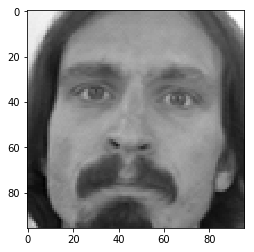

In [8]:
#abc.append(135)
X = np.array(images, dtype = 'float')
print(X.ndim)
X = X.reshape(-1, 96, 96)
#mat = np.reshape(X,(96,))
plt.imshow(X[0], cmap = 'gray')
plt.show()

In [9]:
idLT = pd.read_csv('IdLookupTable.csv')

In [59]:
idLT.head(50)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
5,6,1,left_eye_inner_corner_y,NaN
6,7,1,left_eye_outer_corner_x,NaN
7,8,1,left_eye_outer_corner_y,NaN
8,9,1,right_eye_inner_corner_x,NaN
9,10,1,right_eye_inner_corner_y,NaN


In [14]:
sampleSubmission = pd.read_csv('SampleSubmission.csv')

In [17]:
sampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
RowId       27124 non-null int64
Location    27124 non-null int64
dtypes: int64(2)
memory usage: 423.9 KB


In [41]:
test = pd.read_csv('test.csv')

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [22]:
test.head(10).T

,0,1,2,3,4,5,6,7,8,9
ImageId,1,2,3,4,5,6,7,8,9,10
Image,182 183 182 182 180 180 176 169 156 137 124 10...,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,177 176 174 170 169 169 168 166 166 166 161 14...,176 174 174 175 174 174 176 176 175 171 165 15...,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,177 177 177 171 142 115 97 84 89 90 88 82 63 5...,77 55 44 56 58 61 67 66 65 65 65 73 72 78 86 9...,156 160 162 166 150 114 97 105 125 127 119 121...,230 230 231 231 231 231 231 231 231 229 214 20...,132 129 126 128 146 163 170 169 143 101 71 55 ...


In [9]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [13]:
train.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [15]:
train.fillna(method = 'ffill', inplace = True)

In [16]:
train.isnull().any().value_counts()

False    31
dtype: int64

In [26]:
training = train.drop('Image',axis = 1)

In [27]:
y_train = training.iloc[:, :].values

In [29]:
y_train.shape

(7049, 30)

In [31]:
X.shape

(7049, 96, 96)

In [34]:
#importing libraries for CNN

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout


In [36]:
model = Sequential()

model.add(Flatten(input_shape = (96, 96)))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(30))

In [37]:
model.compile(optimizer = 'adam', 
             loss = 'mse',
             metrics = ['mae', 'accuracy'])

In [39]:
model.fit(X, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/10
5639/5639 [==============================] - 89s 16ms/step - loss: 3502.0396 - mean_absolute_error: 39.2781 - acc: 0.1287 - val_loss: 306.2732 - val_mean_absolute_error: 14.3399 - val_acc: 0.6865
Epoch 2/10
5639/5639 [==============================] - 7s 1ms/step - loss: 1087.1978 - mean_absolute_error: 26.2887 - acc: 0.1582 - val_loss: 398.0102 - val_mean_absolute_error: 17.2481 - val_acc: 0.6872
Epoch 3/10
5639/5639 [==============================] - 5s 959us/step - loss: 953.3206 - mean_absolute_error: 23.7859 - acc: 0.1731 - val_loss: 1156.7887 - val_mean_absolute_error: 31.3417 - val_acc: 0.6872
Epoch 4/10
5639/5639 [==============================] - 5s 973us/step - loss: 961.9293 - mean_absolute_error: 23.8041 - acc: 0.1837 - val_loss: 182.1273 - val_mean_absolute_error: 10.3991 - val_acc: 0.6872
Epoch 5/10
5639/5639 [==============================] - 5s 955us/step - loss: 886.6257 - mean_absolute_error: 22.5254 - acc: 0.

In [51]:
s = time.time()
images_test = [convert_to_int(df = test, im_no = i) for i in range(list(test.shape)[0])]
print(time.time() - s)

25.610218286514282


In [52]:
X_test = np.array(images, dtype = 'float')
print(X_test.ndim)
X_test = X_test.reshape(-1, 96, 96)

2


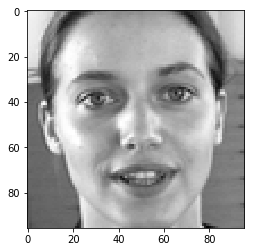

In [54]:
plt.imshow(X_test[20], cmap = 'gray')

In [55]:
pred = model.predict(X_test)

In [56]:
pred[0]

array([47.417984, 27.097223, 21.010086, 27.461489, 43.109257, 27.682379,
       51.871952, 25.431757, 25.65281 , 27.515257, 16.069895, 27.915758,
       38.80537 , 21.633291, 57.589367, 19.940668, 29.327484, 23.109018,
       10.104709, 24.234053, 34.71245 , 44.258194, 49.890633, 52.66332 ,
       23.54419 , 54.92372 , 35.817585, 53.793015, 35.062355, 56.087097],
      dtype=float32)

In [62]:
lookid_list = list(idLT['FeatureName'])
imageID = list(idLT['ImageId']-1)
pre_list = list(pred)

In [64]:
rowid = idLT['RowId']
rowid=list(rowid)

In [84]:
feature = []
for f in (list(idLT['FeatureName'])):
    #feature.append(f)
    #break
    #print(idLT.index(f))
    feature.append(lookid_list.index(f))
feature = list(feature)
print(feature)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 

In [85]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
    


In [87]:
preded

[47.417984,
 27.097223,
 21.010086,
 27.461489,
 43.109257,
 27.682379,
 51.871952,
 25.431757,
 25.65281,
 27.515257,
 16.069895,
 27.915758,
 38.80537,
 21.633291,
 57.589367,
 19.940668,
 29.327484,
 23.109018,
 10.104709,
 24.234053,
 34.71245,
 44.258194,
 49.890633,
 52.66332,
 23.54419,
 54.92372,
 35.817585,
 53.793015,
 35.062355,
 56.087097,
 31.572119,
 18.091864,
 14.0359125,
 18.253775,
 28.625687,
 18.456234,
 34.52549,
 17.02498,
 17.017265,
 18.35315,
 10.787375,
 18.57964,
 25.843792,
 14.399361,
 38.270325,
 13.187706,
 19.596626,
 15.45425,
 6.7417526,
 16.20395,
 23.19694,
 29.361279,
 33.204117,
 35.02857,
 15.713145,
 36.56508,
 23.872835,
 35.79021,
 23.381428,
 37.318993,
 34.021553,
 19.4839,
 15.113967,
 19.677088,
 30.864542,
 19.882395,
 37.206882,
 18.324492,
 18.352139,
 19.769417,
 11.603941,
 20.022802,
 27.847374,
 15.517573,
 41.256645,
 14.231571,
 21.100807,
 16.637516,
 7.2615967,
 17.445234,
 24.976995,
 31.664022,
 35.783497,
 37.754528,
 16.92365

In [88]:
rowid = pd.Series(rowid,name = 'RowId')

In [89]:
loc = pd.Series(preded,name = 'Location')

In [92]:
iID = pd.Series(imageID, name = 'ImageID')

In [104]:
list_of_features = idLT['FeatureName'][:30]
features_2 = [list_of_features[i] for i in feature]

In [106]:
lof = pd.Series(features_2, name = 'FeatureName')

In [107]:
submission = pd.concat([rowid, iID, lof, loc],axis = 1)

In [108]:
submission.to_csv('face_key_detection_submission.csv',index = False)